In [1]:
import os
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

import codecs

def convert_to_sparse_matrix(docs):
    indptr = [0]
    indices = []
    data = []
    vocabulary = {}
    for d in docs:
        for term in d:
            index = vocabulary.setdefault(term, len(vocabulary))
            indices.append(index)
            data.append(1)
        indptr.append(len(indices))
    return csr_matrix((data, indices, indptr), dtype=int)


data_dir = 'messages'
messages = []
y = []
for filename in os.listdir('C:/Users/user/Desktop/강의/ML/messages'):
    with open(os.path.join('C:/Users/user/Desktop/강의/ML/messages', filename), encoding='latin-1') as file:
        subject = file.readline()
        skip = file.readline()
        content = file.readline()
        #Try modifying the message reader so that it also follows the message subject.
        messages.append(subject.split()+content.split())
    if "legit" in filename:
        y.append(1)
    else:
        y.append(0)

In [2]:
os.listdir('C:/Users/user/Desktop/강의/ML/messages')

['100legit29.txt',
 '101002legit41.txt',
 '101006legit31.txt',
 '101011spmsg62.txt',
 '101019spmsg88.txt',
 '101024legit7.txt',
 '101035spmsg107.txt',
 '101035spmsg69.txt',
 '101058spmsg72.txt',
 '101076legit21.txt',
 '101086spmsg101.txt',
 '10108legit18.txt',
 '10147legit51.txt',
 '10149spmsg79.txt',
 '10157legit50.txt',
 '1015legit28.txt',
 '10170legit58.txt',
 '10170legit9.txt',
 '10184spmsg61.txt',
 '10205spmsg73.txt',
 '10209spmsg74.txt',
 '10210spmsg93.txt',
 '1021spmsg80.txt',
 '10227legit48.txt',
 '10231legit1.txt',
 '10249spmsg63.txt',
 '10258spmsg97.txt',
 '10259spmsg67.txt',
 '1025legit11.txt',
 '10289spmsg82.txt',
 '10300legit6.txt',
 '10303legit2.txt',
 '10313spmsg95.txt',
 '10327spmsg91.txt',
 '10337legit39.txt',
 '10337spmsg75.txt',
 '10359legit0.txt',
 '10364legit15.txt',
 '10365spmsg99.txt',
 '10403legit43.txt',
 '10405legit42.txt',
 '10405legit8.txt',
 '10421legit37.txt',
 '10439legit24.txt',
 '10439spmsg89.txt',
 '10452legit44.txt',
 '10471spmsg106.txt',
 '10498legit

In [3]:
X = convert_to_sparse_matrix(messages)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train, X_test, y_train, y_test)

  (0, 0)	1
  (0, 476)	1
  (0, 285)	1
  (0, 2152)	1
  (0, 476)	1
  (0, 476)	1
  (0, 285)	1
  (0, 2152)	1
  (0, 476)	1
  (0, 16)	1
  (0, 964)	1
  (0, 5864)	1
  (0, 12837)	1
  (0, 8)	1
  (0, 1575)	1
  (0, 13035)	1
  (0, 4818)	1
  (0, 476)	1
  (0, 11)	1
  (0, 800)	1
  (0, 476)	1
  (0, 41)	1
  (0, 2918)	1
  (0, 98)	1
  (0, 59)	1
  :	:
  (729, 16)	1
  (729, 22004)	1
  (729, 1414)	1
  (729, 10028)	1
  (729, 3092)	1
  (729, 14)	1
  (729, 14)	1
  (729, 14)	1
  (729, 2007)	1
  (729, 12)	1
  (729, 22005)	1
  (729, 67)	1
  (729, 2917)	1
  (729, 22006)	1
  (729, 8)	1
  (729, 80)	1
  (729, 2364)	1
  (729, 12)	1
  (729, 2399)	1
  (729, 501)	1
  (729, 11)	1
  (729, 2953)	1
  (729, 14)	1
  (729, 14)	1
  (729, 14)	1   (0, 0)	1
  (0, 6)	1
  (0, 246)	1
  (0, 21962)	1
  (0, 24)	1
  (0, 436)	1
  (0, 505)	1
  (0, 10)	1
  (0, 59)	1
  (0, 76)	1
  (0, 16)	1
  (0, 596)	1
  (0, 98)	1
  (0, 87)	1
  (0, 832)	1
  (0, 665)	1
  (0, 86)	1
  (0, 63)	1
  (0, 939)	1
  (0, 2756)	1
  (0, 206)	1
  (0, 10)	1
  (0, 75)	1
  (0,

In [4]:
#MultinomialNB
clf = MultinomialNB(class_prior=[99.999999999999999, 0.000000000000001])
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=[100.0, 1e-15], fit_prior=True)

In [5]:
#check labes of Y
print(clf.classes_)
print(clf.class_count_)
#print(319/(319+411))

[0 1]
[319. 411.]


In [6]:
y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)
y_probs = y_probs[:, 1]

In [7]:
#Check AUC score
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_probs)
print('AUC: %.2f' % auc)

AUC: 0.99


In [8]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

In [9]:
#plot roc curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

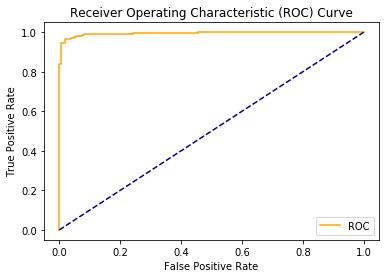

In [10]:
plot_roc_curve(fpr, tpr)

In [11]:
#confusion matrix
import sklearn.metrics as metrics
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       162
           1       1.00      0.81      0.89       199

    accuracy                           0.89       361
   macro avg       0.91      0.90      0.89       361
weighted avg       0.91      0.89      0.89       361

[[162   0]
 [ 38 161]]


In [12]:
def find_bigrams(input_list):
    bigram_list = []
    for i in range(len(input_list)-1):
        bigram_list.append((input_list[i], input_list[i+1]))
    return bigram_list

In [13]:
#check the function
messages = []

with open(os.path.join('C:/Users/user/Desktop/강의/ML/messages/53legit7.txt'), encoding='latin-1') as file:
    subject = file.readline()
    skip = file.readline()
    content = file.readline()
    split_subject_content = subject.split() + content.split()
    bigrams = find_bigrams(split_subject_content)
    messages.append(bigrams)
    
messages

[[('Subject:', '113'),
  ('113', '84'),
  ('84', '780'),
  ('780', '80'),
  ('80', '2063'),
  ('2063', '118'),
  ('118', '2182'),
  ('2182', '80'),
  ('80', '18418'),
  ('18418', '80'),
  ('80', '2766'),
  ('2766', '80'),
  ('80', '2105'),
  ('2105', '590'),
  ('590', '17915'),
  ('17915', '9594'),
  ('9594', '118'),
  ('118', '19381'),
  ('19381', '82'),
  ('82', '780'),
  ('780', '84'),
  ('84', '16538'),
  ('16538', '14745'),
  ('14745', '771'),
  ('771', '12111'),
  ('12111', '84'),
  ('84', '7666'),
  ('7666', '118'),
  ('118', '10950'),
  ('10950', '84'),
  ('84', '9804'),
  ('9804', '118'),
  ('118', '113'),
  ('113', '84'),
  ('84', '780'),
  ('780', '80'),
  ('80', '2063'),
  ('2063', '118'),
  ('118', '2182'),
  ('2182', '80'),
  ('80', '18418'),
  ('18418', '80'),
  ('80', '2766'),
  ('2766', '80'),
  ('80', '2105'),
  ('2105', '590'),
  ('590', '6555'),
  ('6555', '118'),
  ('118', '11961'),
  ('11961', '8908'),
  ('8908', '317'),
  ('317', '118'),
  ('118', '15301'),
  ('1

In [14]:
messages = []
y_bi = []

for filename in os.listdir('C:/Users/user/Desktop/강의/ML/messages'):
    with open(os.path.join('C:/Users/user/Desktop/강의/ML/messages', filename), encoding='latin-1') as file:
        subject = file.readline()
        skip = file.readline()
        content = file.readline()
        split_subject_content = subject.split() + content.split()
        bigrams = find_bigrams(split_subject_content)
        messages.append(bigrams)
    if "legit" in filename:
        y_bi.append(1)
    else:
        y_bi.append(0)

In [15]:
X_bi = convert_to_sparse_matrix(messages)
y_bi = np.array(y_bi)
X_train_bi, X_test_bi, y_train_bi, y_test_bi = train_test_split(X_bi, y_bi, test_size=0.33, random_state=42)

print(X_train_bi, X_test_bi, y_train_bi, y_test_bi)

  (0, 5792)	1
  (0, 79057)	1
  (0, 79058)	1
  (0, 79059)	1
  (0, 1085)	1
  (0, 79057)	1
  (0, 79058)	1
  (0, 79059)	1
  (0, 6803)	1
  (0, 79060)	1
  (0, 79061)	1
  (0, 79062)	1
  (0, 77723)	1
  (0, 40468)	1
  (0, 79063)	1
  (0, 79064)	1
  (0, 79065)	1
  (0, 5336)	1
  (0, 59181)	1
  (0, 79066)	1
  (0, 1780)	1
  (0, 79067)	1
  (0, 55534)	1
  (0, 368)	1
  (0, 79068)	1
  :	:
  (729, 56146)	1
  (729, 155466)	1
  (729, 155467)	1
  (729, 155468)	1
  (729, 155469)	1
  (729, 155470)	1
  (729, 2557)	1
  (729, 2557)	1
  (729, 155471)	1
  (729, 155472)	1
  (729, 155473)	1
  (729, 155474)	1
  (729, 113794)	1
  (729, 155475)	1
  (729, 155476)	1
  (729, 115)	1
  (729, 147530)	1
  (729, 155477)	1
  (729, 155478)	1
  (729, 155479)	1
  (729, 45215)	1
  (729, 120561)	1
  (729, 27790)	1
  (729, 2557)	1
  (729, 2557)	1   (0, 123431)	1
  (0, 18321)	1
  (0, 155143)	1
  (0, 155144)	1
  (0, 964)	1
  (0, 35410)	1
  (0, 1157)	1
  (0, 9651)	1
  (0, 2653)	1
  (0, 84915)	1
  (0, 101088)	1
  (0, 155145)	1
  (0, 166)

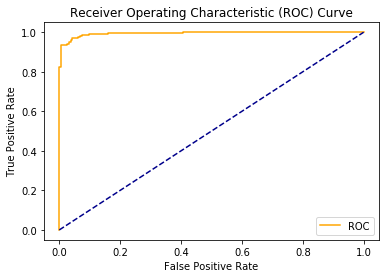

In [16]:
#Try using a 2-gram model
clf.fit(X_train_bi, y_train_bi)
y_pred_bi = clf.predict(X_test_bi)
y_probs_bi = clf.predict_proba(X_test_bi)
y_probs_bi = y_probs_bi[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_bi, y_probs_bi)
plot_roc_curve(fpr, tpr)

In [17]:
#confusion matrix
import sklearn.metrics as metrics
print(metrics.classification_report(y_test_bi,y_pred_bi))
print(metrics.confusion_matrix(y_test_bi,y_pred_bi))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       162
           1       1.00      0.81      0.90       199

    accuracy                           0.90       361
   macro avg       0.91      0.91      0.90       361
weighted avg       0.92      0.90      0.90       361

[[162   0]
 [ 37 162]]
